In [1]:
import pandas as pd
import numpy as np

In [46]:
X_train = pd.read_csv('./data/nba/X_train.csv')
y_train = pd.read_csv('./data/nba/y_train.csv')

X_test = pd.read_csv('./data/nba/X_test.csv')

In [47]:
print(X_train.shape)
print(X_train.columns)
X_train_columns = X_train.columns
print(y_train.columns)

(52399, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


In [48]:
print(X_train[:4])
print(y_train[:4])

   PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0       2         557        15.5         0         0.7        2.1         2   
1       2         151        20.1         0         0.8        2.7         2   
2       3         448        14.2         0         0.8        5.1         2   
3       1         279        10.6         0         0.6        1.9         2   

   CLOSE_DEF_DIST  
0             0.0  
1             3.4  
2             0.1  
3             2.7  
   FGM
0    1
1    1
2    0
3    1


In [49]:
def pd2np(df):
    return df.as_matrix()

In [50]:
# 'SHOT_CLOCK', 'SHOT_DIST', 'CLOSE_DEF_DIST'
#  ['SHOT_CLOCK', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']
# X_train = pd2np(X_train.drop(['GAME_CLOCK', 'TOUCH_TIME',
#        'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'], axis=1))
X_train = pd2np(X_train.drop(['PERIOD', 'GAME_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'PTS_TYPE'], axis=1))
# X_train = pd2np(X_train)
y_train = pd2np(y_train)

X_test = pd2np(X_test.drop(['PERIOD', 'GAME_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'PTS_TYPE'], axis=1))
# X_test = pd2np(X_test.drop(['PERIOD', 'GAME_CLOCK','DRIBBLES','PTS_TYPE'], axis=1))
# X_test = pd2np(X_test)

In [51]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(52399, 3)


In [52]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [53]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [54]:
 XX_train, X_valid, yy_train, y_valid = train_test_split(
    X_train_std, y_train, test_size=0.3, random_state=2)
for a in [0.001, 0.01, 0.1, 1, 10]:
    lr_lasso = Lasso(alpha=a)
    lr_lasso.fit(XX_train, yy_train)

    y_train_pred = lr_lasso.predict(XX_train)
    y_test_pred = lr_lasso.predict(X_valid)

    print('\n[Alpha = %.2f]' % a )
    print('MSE train: %.2f, test: %.2f' % (
                    mean_squared_error(yy_train, y_train_pred),
                    mean_squared_error(y_valid, y_test_pred),))                                          


[Alpha = 0.00]
MSE train: 0.23, test: 0.24

[Alpha = 0.01]
MSE train: 0.24, test: 0.24

[Alpha = 0.10]
MSE train: 0.25, test: 0.25

[Alpha = 1.00]
MSE train: 0.25, test: 0.25

[Alpha = 10.00]
MSE train: 0.25, test: 0.25


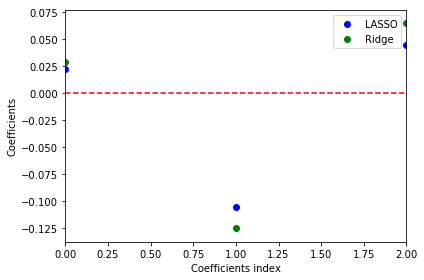

Selected attributes: Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK'], dtype='object')


In [55]:
var_num = X_train_std.shape[1]

lr_lasso = Lasso(alpha = 0.01)
lr_lasso.fit(X_train_std, y_train)
lr_ridge = Ridge(alpha = 0.1)
lr_ridge.fit(X_train_std, y_train)

plt.scatter(range(var_num),lr_lasso.coef_, label = 'LASSO', color = 'blue')
plt.scatter(range(var_num),lr_ridge.coef_, label = 'Ridge', color = 'green')
plt.hlines(y=0, xmin=0, xmax=var_num-1, color='red', linestyle ='--')
plt.xlim(0,var_num-1)
plt.legend(loc = 'upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

epsilon = 2e-2
idxs = np.where(abs(lr_lasso.coef_) > epsilon)
print('Selected attributes: {}'.format(X_train_columns[idxs]))

In [56]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [57]:
ppn = Perceptron(max_iter=1000, eta0=1e-3, shuffle = True,random_state=6)
ppn.fit(XX_train, yy_train)
y_pred = ppn.predict(X_valid)
y_pred = np.reshape(y_pred,(y_pred.shape[0],1))
print('Perceptron Misclassified samples: %d' % (y_valid != y_pred).sum())
print('Perceptron Accuracy: %.5f' % accuracy_score(y_valid, y_pred))

clf = RandomForestClassifier(n_estimators=100,max_depth=7,random_state=2,n_jobs=2)
clf.fit(XX_train, yy_train)
y_pred1 = clf.predict(X_valid)
y_pred1 = np.reshape(y_pred1,(y_pred1.shape[0],1))
print('RandomForestClassifier Misclassified samples: %d' % (y_valid != y_pred1).sum())
print('RandomForestClassifier Accuracy: %.5f' % accuracy_score(y_valid, y_pred1))

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
tree.fit(XX_train, yy_train)
y_pred2 = tree.predict(X_valid)
y_pred2 = np.reshape(y_pred2,(y_pred2.shape[0],1))
print('DecisionTreeClassifier Misclassified samples: %d' % (y_valid != y_pred2).sum())
print('DecisionTreeClassifier Accuracy: %.5f' % accuracy_score(y_valid, y_pred2))
for i in range(y_valid.shape[0]):
    if not y_pred[i][0] == y_pred1[i][0] == y_pred2[i][0] :
        if (y_pred[i][0] + y_pred1[i][0] + y_pred2[i][0])/2 < 1:
            y_pred[i][0] = 0
        else:
            y_pred[i][0] = 1 
print('Final Misclassified samples: %d' % (y_valid != y_pred).sum())
print('Final Accuracy: %.5f' % accuracy_score(y_valid, y_pred))

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron Misclassified samples: 6027
Perceptron Accuracy: 0.61660


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier Misclassified samples: 6010
RandomForestClassifier Accuracy: 0.61768
DecisionTreeClassifier Misclassified samples: 6063
DecisionTreeClassifier Accuracy: 0.61431
Final Misclassified samples: 5999
Final Accuracy: 0.61838


In [58]:
y_pred = ppn.predict(X_test_std)
y_pred = np.reshape(y_pred,(y_pred.shape[0],1))

y_pred1 = clf.predict(X_test_std)
y_pred1 = np.reshape(y_pred1,(y_pred1.shape[0],1))

y_pred2 = tree.predict(X_test_std)
y_pred2 = np.reshape(y_pred2,(y_pred2.shape[0],1))
for i in range(X_test_std.shape[0]):
    if not y_pred[i][0] == y_pred1[i][0] == y_pred2[i][0] :
        if (y_pred[i][0] + y_pred1[i][0] + y_pred2[i][0])/2 < 1:
            y_pred[i][0] = 0
        else:
            y_pred[i][0] = 1 

In [ ]:
from sklearn.learning_curve import learning_curve
# poly = PolynomialFeatures(degree=d)
# X = poly.fit_transform(x[:,np.newaxis])

# lr = LinearRegression()
# c, r = XX_train.shape
# X = XX_train.reshape(c,)
c, r = y_train.shape
y_train = y_train.reshape(c,)

In [103]:
# d = {'col1': [1, 2], 'col2': [3, 4]}
d = {}
for i in range(X_test_std.shape[0]):
    d[i] = y_pred[i][0]

In [104]:
df = pd.DataFrame(data=d, index=['FGM'])

In [105]:
df

,0,1,2,3,4,5,6,7,8,9,...,13090,13091,13092,13093,13094,13095,13096,13097,13098,13099
FGM,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [222]:
df.to_csv('y_pred.csv')

1 How you evaluate your model
A1: the higher accuracy_score the better model
2 All models you have tried and the result
A2: Perceptron : I tried different random_states and the results varies a lot. So, I ran an experiment 
        to find better result from random_state 1 to 300 and all results' accuracy range is between 0.4 to 0.61
    RandomForestClassifier : I tried different degree and random_state. Different degrees varies but when it achieves
        higher degree, the accuracy merely improves slightly. Different random_state varies slightly different so I just
        picked one slightly better. The accuracies' range of different degree is between 0.61 to 0.62
    DecisionTreeClassifier : I tried different degree and random_state. Different degrees varies but when it achieves
        higher degree, the accuracy merely improves slightly. Using different random_states does't make much difference 
        in accuracy. The accuracies' range of different degree is between 0.61 to 0.62
3 Plot the learning curve of your best model and tell if it is over-fit or not
A3: the curves are below and they seems not over-fit
4 The top-3 features you find and how you find it
A4:
    I find a better alpha to train lasso and then I train a lasso model to get its coefficients. 
    According to the coefficients, we can get top-3 features.
5 A brief report what you do in this assignment
A5: training step
    step1 --> train the best Perceptron by tuning random_state, RandomForestClassifier by tuning degree and 
    random_state and DecisionTreeClassifier by tuning degree
    step2 --> use these three classifiers to vote for the final prediction

In [71]:
def mse(model, X, y):
    return accuracy_score(y, model.predict(X))
#     return (y != model.predict(X)).sum()
#     return ((model.predict(X) - y)**2).mean()

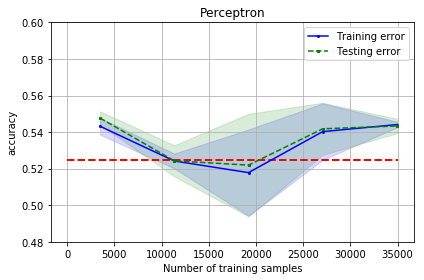

In [99]:
train_sizes, train_scores, test_scores = learning_curve(estimator=ppn, X=X_train_std, y=y_train, scoring=mse)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=2,
    label='Training error')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=2,
    label='Testing error')
plt.fill_between(train_sizes,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15, color='green')

plt.hlines(y=0.525 ,xmin=0, xmax=35000, color='red', linewidth=2, linestyle='--')
plt.title('Perceptron')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.ylim([0.48, 0.6])
plt.tight_layout()
# plt.savefig('./output/fig-learning-curve-%d.png' % d, dpi=300)
plt.show()

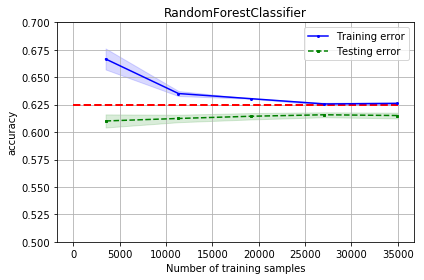

In [96]:
train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_train_std, y=y_train, scoring=mse)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=2,
    label='Training error')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=2,
    label='Testing error')
plt.fill_between(train_sizes,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15, color='green')

plt.hlines(y=0.625, xmin=0, xmax=35000, color='red', linewidth=2, linestyle='--')
plt.title('RandomForestClassifier')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.ylim([0.5, 0.7])
plt.tight_layout()
# plt.savefig('./output/fig-learning-curve-%d.png' % d, dpi=300)
plt.show()

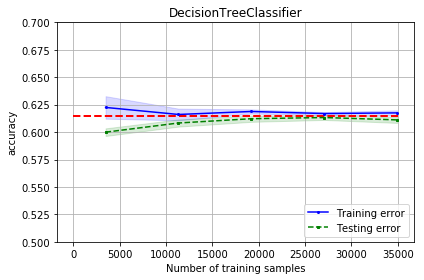

In [97]:
train_sizes, train_scores, test_scores = learning_curve(estimator=tree, X=X_train_std, y=y_train, scoring=mse)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=2,
    label='Training error')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=2,
    label='Testing error')
plt.fill_between(train_sizes,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15, color='green')

plt.hlines(y=0.615, xmin=0, xmax=35000, color='red', linewidth=2, linestyle='--')
plt.title('DecisionTreeClassifier')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 0.7])
plt.tight_layout()
# plt.savefig('./output/fig-learning-curve-%d.png' % d, dpi=300)
plt.show()